Connected to Python 3.10.12

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

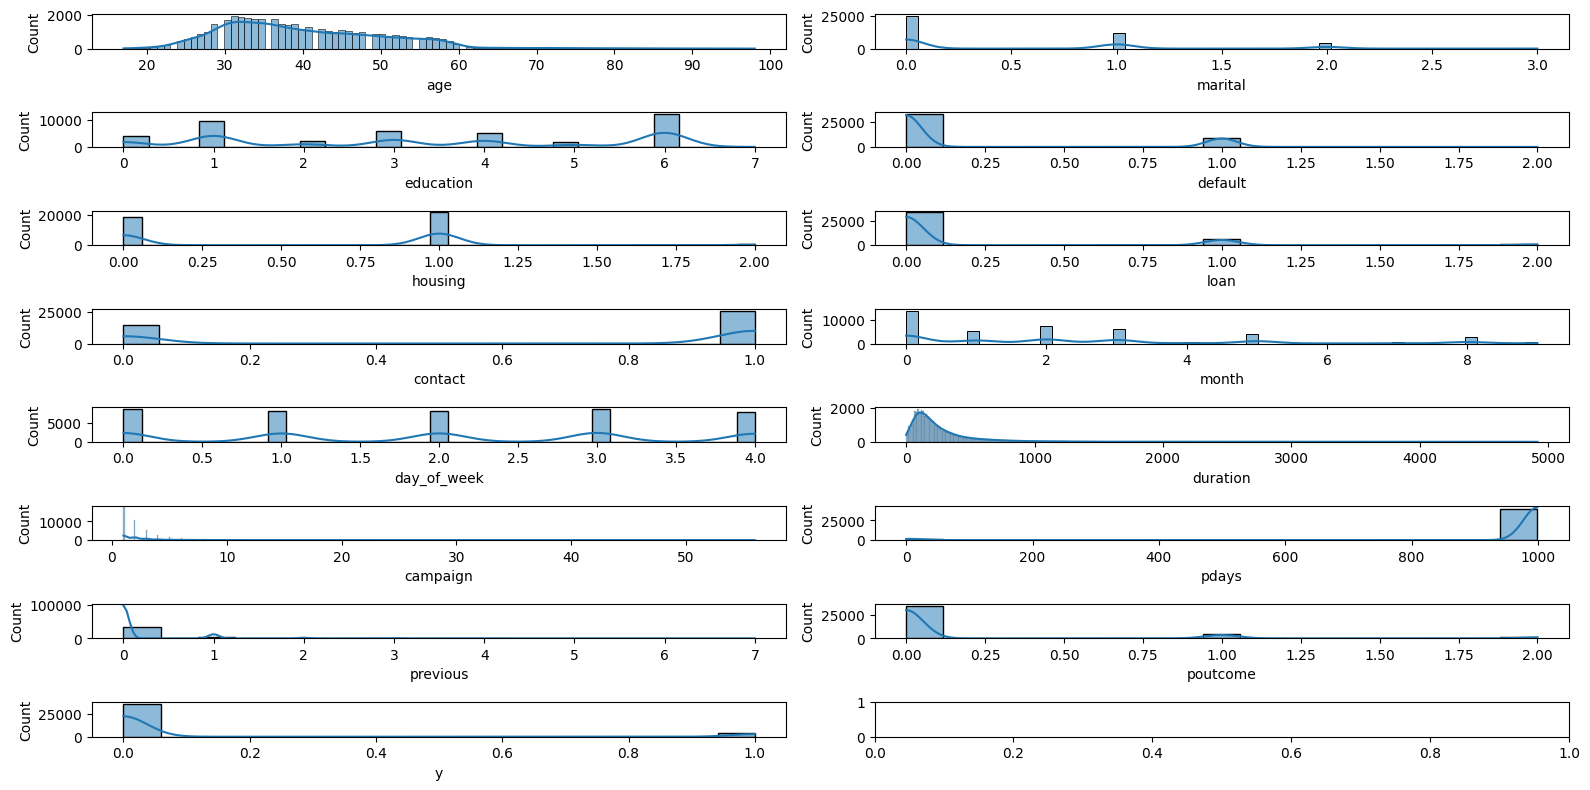

In [4]:
from utils import db_connect
engine = db_connect()

# your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

 #%%

customer_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(customer_data.head())

# STEP 1: PERFORM EDA

# Gain first insights into dataset
print(customer_data.info())
print(customer_data.describe())

# Handle duplicates
duplicates = customer_data.duplicated().sum()
if duplicates !=0:
    customer_data.drop_duplicates(inplace=True)

# Remove dimensions irrelated to business problem

customer_data.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

# Convert categorical values to numerical
cat_dimensions = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Dictionary to store mapping
factorize_mappings = {}

for col in cat_dimensions:
    encoded_value, categories = pd.factorize(customer_data[col])
    factorize_mappings[col] = dict(enumerate(categories))
    customer_data[col] = encoded_value
print(customer_data.head())
print(customer_data.info())
print(factorize_mappings)

# Univariate analysis
fig, axis = plt.subplots(8,2, figsize=(16,8))
sns.histplot(ax=axis[0,0], data=customer_data, x=customer_data['age'], kde=True)
sns.histplot(ax=axis[0,1], data=customer_data, x=customer_data['marital'], kde=True)
sns.histplot(ax=axis[1,0], data=customer_data, x=customer_data['education'], kde=True)
sns.histplot(ax=axis[1,1], data=customer_data, x=customer_data['default'], kde=True)
sns.histplot(ax=axis[2,0], data=customer_data, x=customer_data['housing'], kde=True)
sns.histplot(ax=axis[2,1], data=customer_data, x=customer_data['loan'], kde=True)
sns.histplot(ax=axis[3,0], data=customer_data, x=customer_data['contact'], kde=True)
sns.histplot(ax=axis[3,1], data=customer_data, x=customer_data['month'], kde=True)
sns.histplot(ax=axis[4,0], data=customer_data, x=customer_data['day_of_week'], kde=True)
sns.histplot(ax=axis[4,1], data=customer_data, x=customer_data['duration'], kde=True)
sns.histplot(ax=axis[5,0], data=customer_data, x=customer_data['campaign'], kde=True)
sns.histplot(ax=axis[5,1], data=customer_data, x=customer_data['pdays'], kde=True)
sns.histplot(ax=axis[6,0], data=customer_data, x=customer_data['previous'], kde=True)
sns.histplot(ax=axis[6,1], data=customer_data, x=customer_data['poutcome'], kde=True)
sns.histplot(ax=axis[7,0], data=customer_data, x=customer_data['y'], kde=True)

plt.tight_layout()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

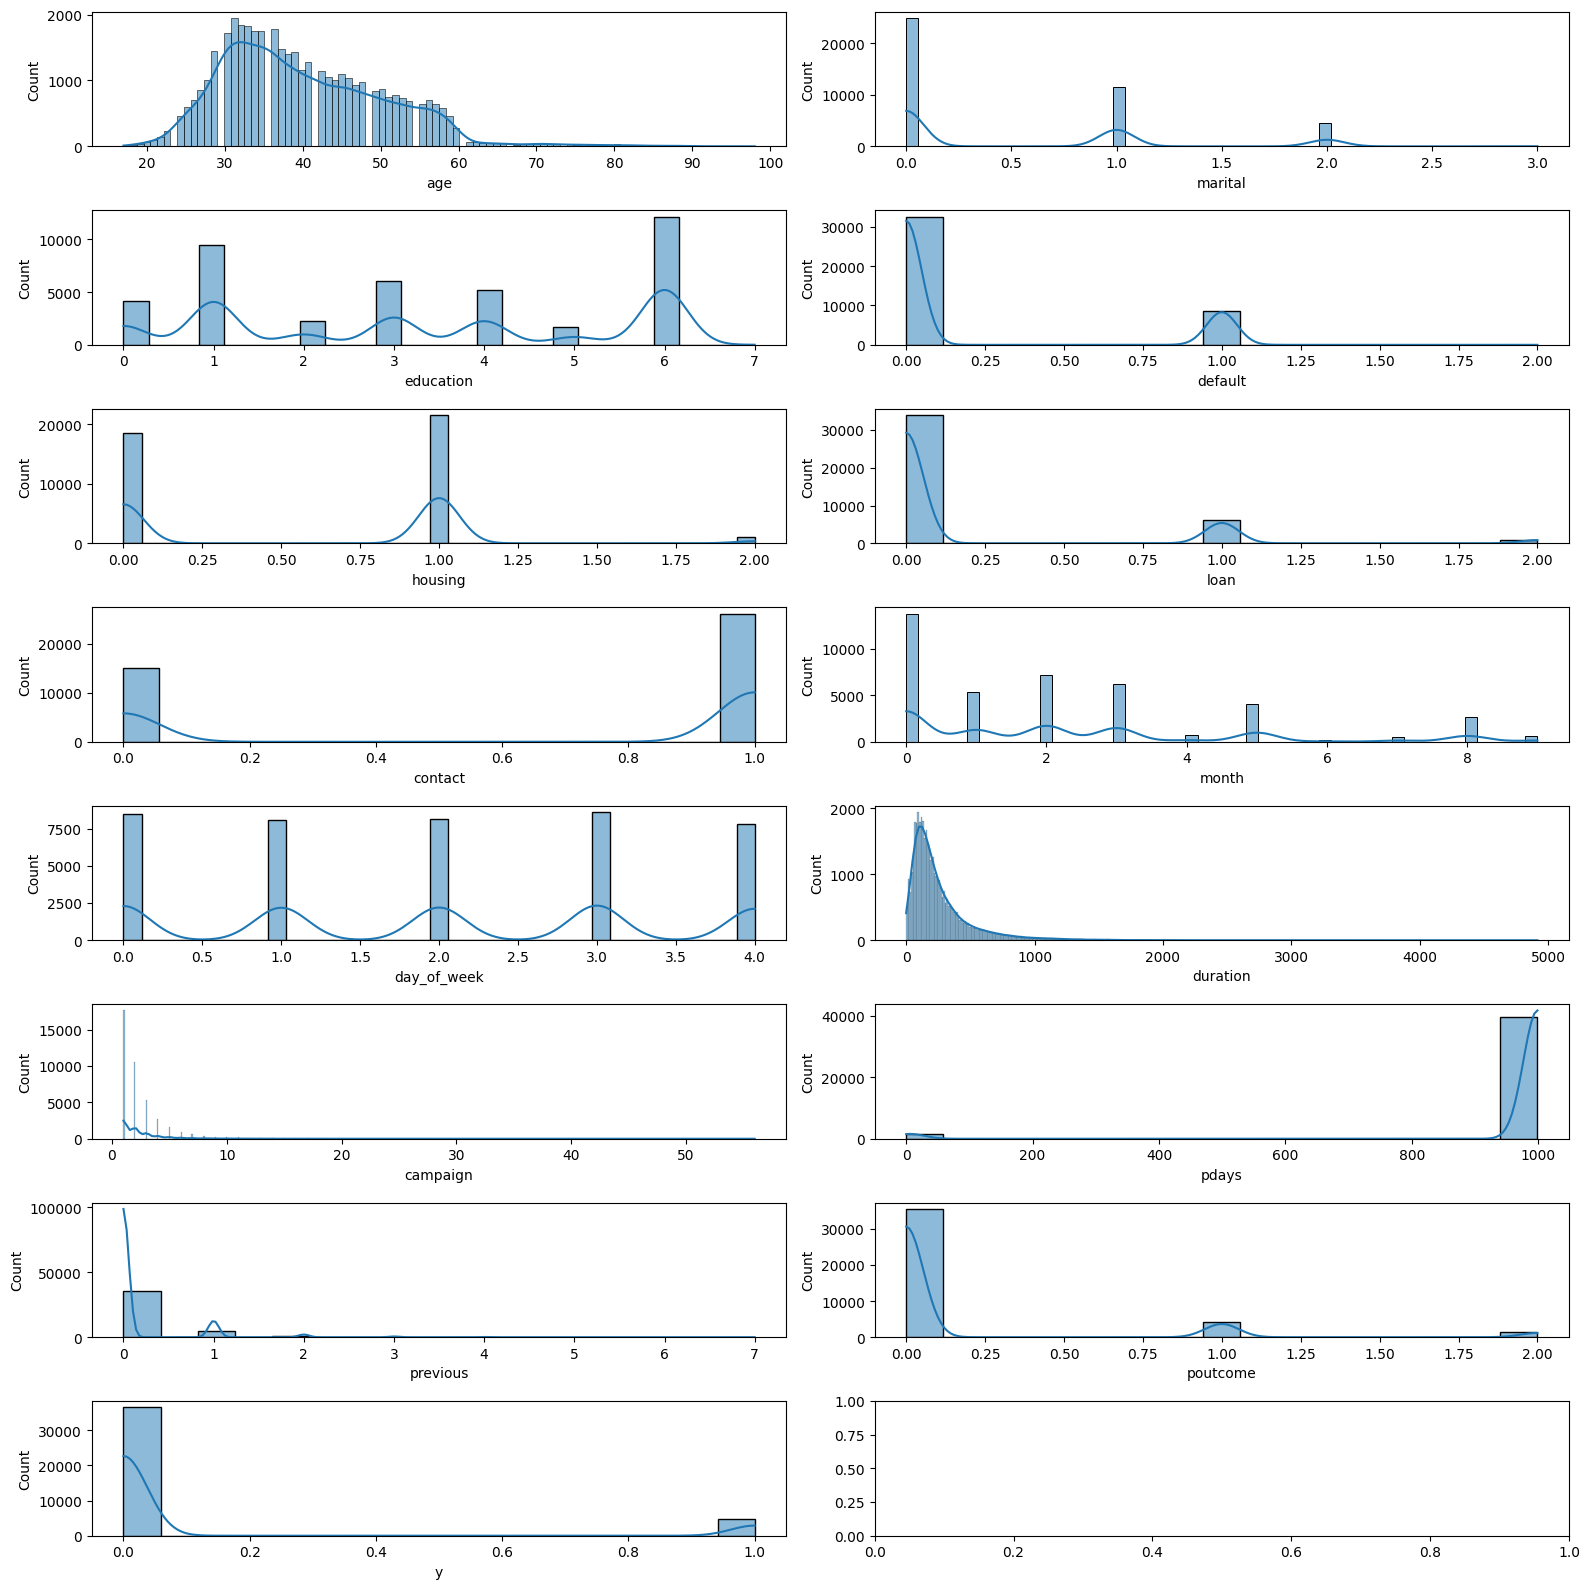

In [5]:
from utils import db_connect
engine = db_connect()

# your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

 #%%

customer_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(customer_data.head())

# STEP 1: PERFORM EDA

# Gain first insights into dataset
print(customer_data.info())
print(customer_data.describe())

# Handle duplicates
duplicates = customer_data.duplicated().sum()
if duplicates !=0:
    customer_data.drop_duplicates(inplace=True)

# Remove dimensions irrelated to business problem

customer_data.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

# Convert categorical values to numerical
cat_dimensions = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Dictionary to store mapping
factorize_mappings = {}

for col in cat_dimensions:
    encoded_value, categories = pd.factorize(customer_data[col])
    factorize_mappings[col] = dict(enumerate(categories))
    customer_data[col] = encoded_value
print(customer_data.head())
print(customer_data.info())
print(factorize_mappings)

# Univariate analysis
fig, axis = plt.subplots(8,2, figsize=(16,16))
sns.histplot(ax=axis[0,0], data=customer_data, x=customer_data['age'], kde=True)
sns.histplot(ax=axis[0,1], data=customer_data, x=customer_data['marital'], kde=True)
sns.histplot(ax=axis[1,0], data=customer_data, x=customer_data['education'], kde=True)
sns.histplot(ax=axis[1,1], data=customer_data, x=customer_data['default'], kde=True)
sns.histplot(ax=axis[2,0], data=customer_data, x=customer_data['housing'], kde=True)
sns.histplot(ax=axis[2,1], data=customer_data, x=customer_data['loan'], kde=True)
sns.histplot(ax=axis[3,0], data=customer_data, x=customer_data['contact'], kde=True)
sns.histplot(ax=axis[3,1], data=customer_data, x=customer_data['month'], kde=True)
sns.histplot(ax=axis[4,0], data=customer_data, x=customer_data['day_of_week'], kde=True)
sns.histplot(ax=axis[4,1], data=customer_data, x=customer_data['duration'], kde=True)
sns.histplot(ax=axis[5,0], data=customer_data, x=customer_data['campaign'], kde=True)
sns.histplot(ax=axis[5,1], data=customer_data, x=customer_data['pdays'], kde=True)
sns.histplot(ax=axis[6,0], data=customer_data, x=customer_data['previous'], kde=True)
sns.histplot(ax=axis[6,1], data=customer_data, x=customer_data['poutcome'], kde=True)
sns.histplot(ax=axis[7,0], data=customer_data, x=customer_data['y'], kde=True)

plt.tight_layout()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

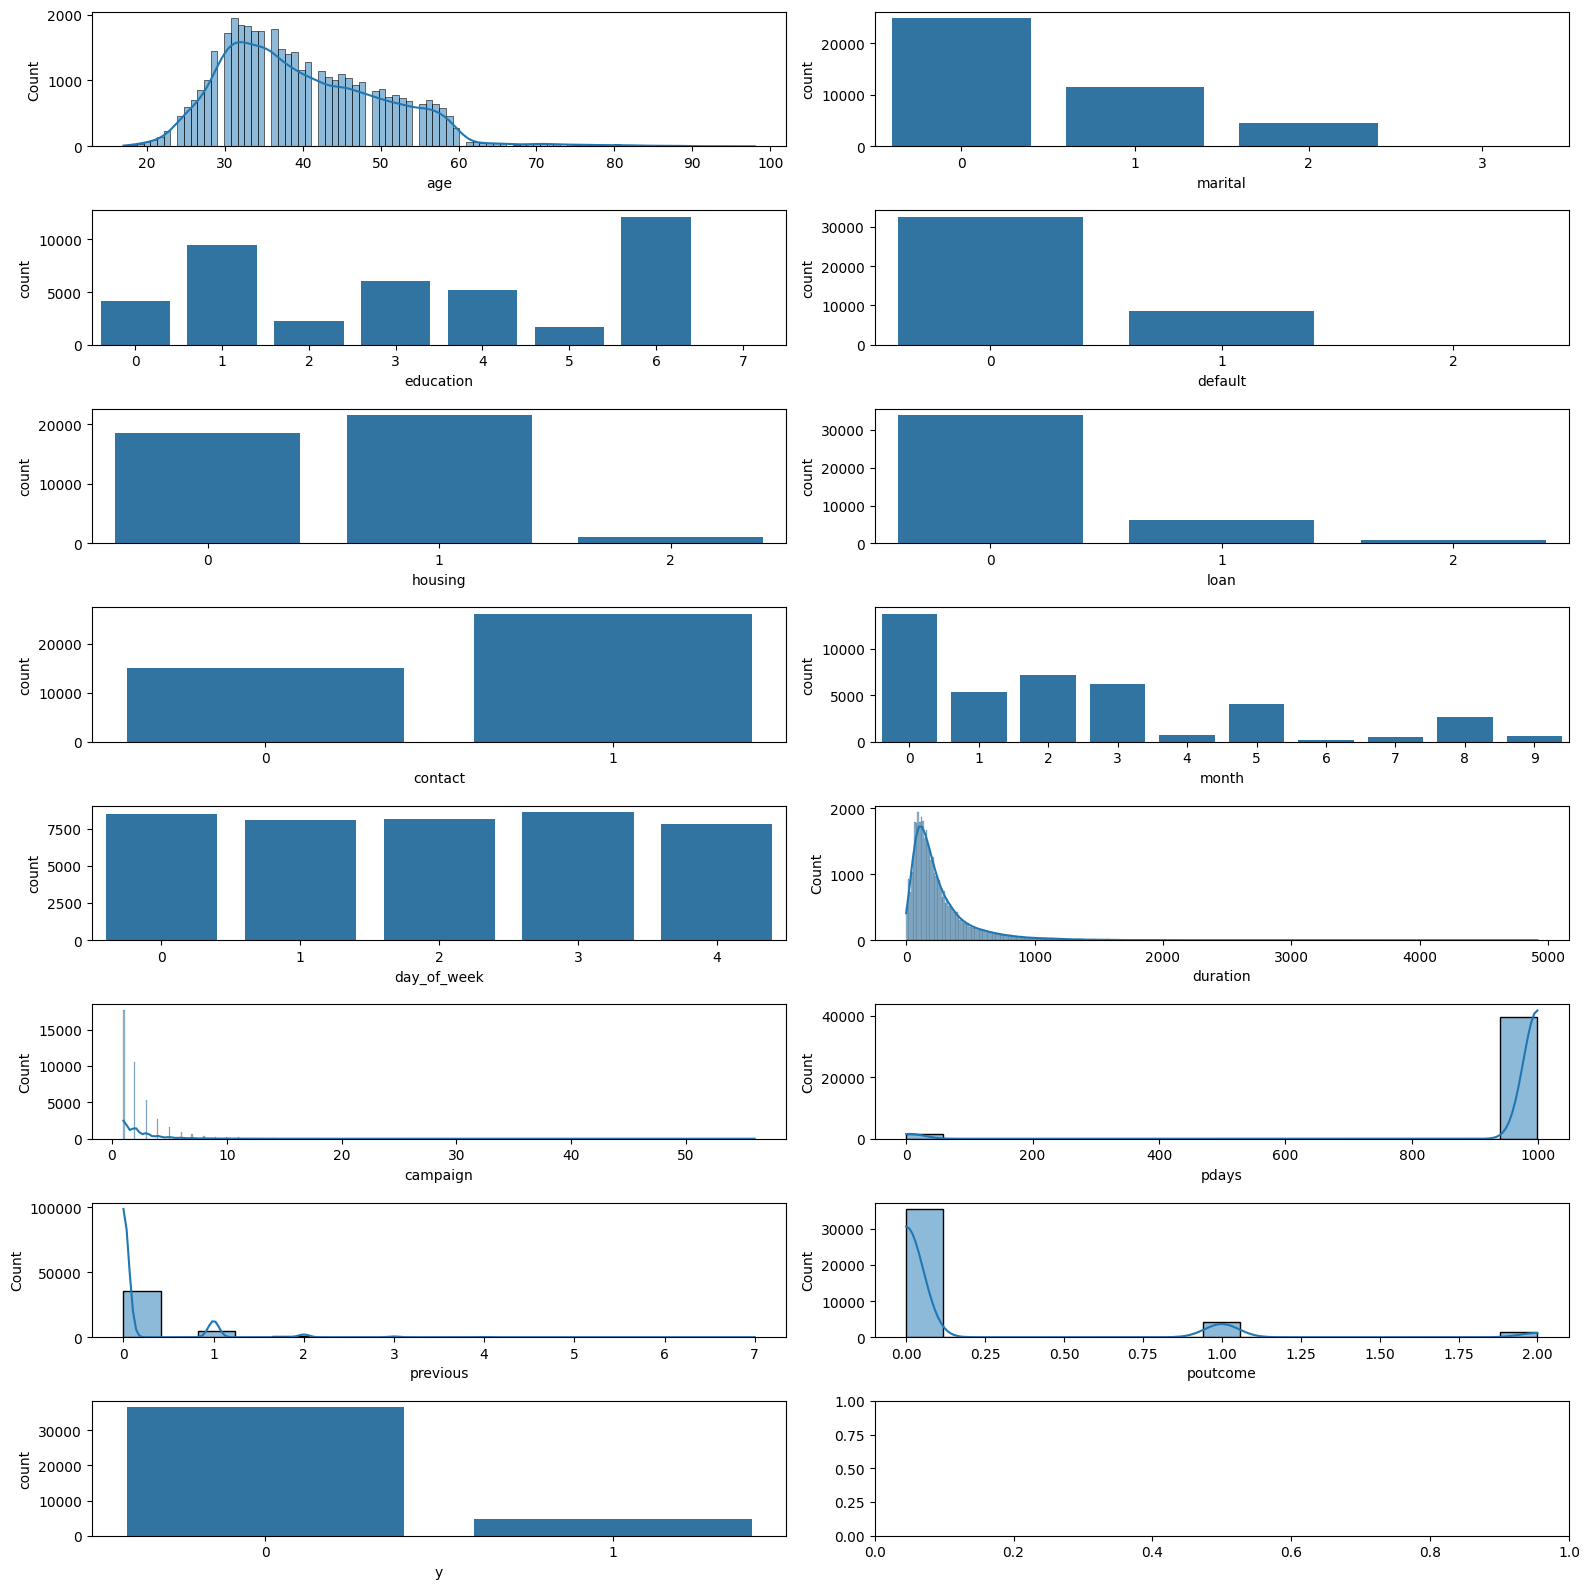

In [6]:
from utils import db_connect
engine = db_connect()

# your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

 #%%

customer_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(customer_data.head())

# STEP 1: PERFORM EDA

# Gain first insights into dataset
print(customer_data.info())
print(customer_data.describe())

# Handle duplicates
duplicates = customer_data.duplicated().sum()
if duplicates !=0:
    customer_data.drop_duplicates(inplace=True)

# Remove dimensions irrelated to business problem

customer_data.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

# Convert categorical values to numerical
cat_dimensions = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Dictionary to store mapping
factorize_mappings = {}

for col in cat_dimensions:
    encoded_value, categories = pd.factorize(customer_data[col])
    factorize_mappings[col] = dict(enumerate(categories))
    customer_data[col] = encoded_value
print(customer_data.head())
print(customer_data.info())
print(factorize_mappings)

# Univariate analysis
fig, axis = plt.subplots(8,2, figsize=(16,16))
sns.histplot(ax=axis[0,0], data=customer_data, x=customer_data['age'], kde=True)
sns.countplot(ax=axis[0,1], data=customer_data, x=customer_data['marital'])
sns.countplot(ax=axis[1,0], data=customer_data, x=customer_data['education'])
sns.countplot(ax=axis[1,1], data=customer_data, x=customer_data['default'])
sns.countplot(ax=axis[2,0], data=customer_data, x=customer_data['housing'])
sns.countplot(ax=axis[2,1], data=customer_data, x=customer_data['loan'])
sns.countplot(ax=axis[3,0], data=customer_data, x=customer_data['contact'])
sns.countplot(ax=axis[3,1], data=customer_data, x=customer_data['month'])
sns.countplot(ax=axis[4,0], data=customer_data, x=customer_data['day_of_week'])
sns.histplot(ax=axis[4,1], data=customer_data, x=customer_data['duration'], kde=True)
sns.histplot(ax=axis[5,0], data=customer_data, x=customer_data['campaign'], kde=True)
sns.histplot(ax=axis[5,1], data=customer_data, x=customer_data['pdays'], kde=True)
sns.histplot(ax=axis[6,0], data=customer_data, x=customer_data['previous'], kde=True)
sns.histplot(ax=axis[6,1], data=customer_data, x=customer_data['poutcome'], kde=True)
sns.countplot(ax=axis[7,0], data=customer_data, x=customer_data['y'])

plt.tight_layout()